In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../data/telecom_customer_churn.csv')

In [10]:
# Информация о колонках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [12]:
# Информация о числовых полях таблицы
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [14]:
# Посмотрим колчество пропусков в колонках
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [16]:
# Заменим пропуски в категориальных столбцах, связанных с услугами
service_columns = [
    "Internet Type", "Online Security", "Online Backup", "Device Protection Plan", 
    "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music", 
    "Unlimited Data", "Multiple Lines"
]

# Заменим пропуски в числовых столбцах, связанных с услугами
# Предположим, что пропуски в `Avg Monthly Long Distance Charges` означают, что клиент не использует эту услугу
df["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)

# Заполним значения "No Service" для пропусков в этих столбцах
df[service_columns] = df[service_columns].fillna("No Service")

# Столбцы `Churn Category` и `Churn Reason`: заполним пропуски значением "Not Churned"
df["Churn Category"].fillna("Not Churned", inplace=True)
df["Churn Reason"].fillna("Not Churned", inplace=True)

# Добавим бинарный столбец "Churned" для удобства анализа (1 — ушедшие клиенты, 0 — оставшиеся)
df["Churned"] = df["Churn Category"].apply(lambda x: 1 if x != "Not Churned" else 0)

# Посмотрим на результат изменений и количество оставшихся пропусков
remaining_na = df.isnull().sum()
df_sample = df.head()

remaining_na, df_sample


C:\Users\1\AppData\Local\Temp\ipykernel_27644\77405120.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)
C:\Users\1\AppData\Local\Temp\ipykernel_27644\77405120.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

(Customer ID                             0
 Gender                                  0
 Age                                     0
 Married                                 0
 Number of Dependents                    0
 City                                    0
 Zip Code                                0
 Latitude                                0
 Longitude                               0
 Number of Referrals                     0
 Tenure in Months                        0
 Offer                                3877
 Phone Service                           0
 Avg Monthly Long Distance Charges       0
 Multiple Lines                          0
 Internet Service                        0
 Internet Type                           0
 Avg Monthly GB Download              1526
 Online Security                         0
 Online Backup                           0
 Device Protection Plan                  0
 Premium Tech Support                    0
 Streaming TV                            0
 Streaming 

<Axes: xlabel='Customer Status', ylabel='count'>

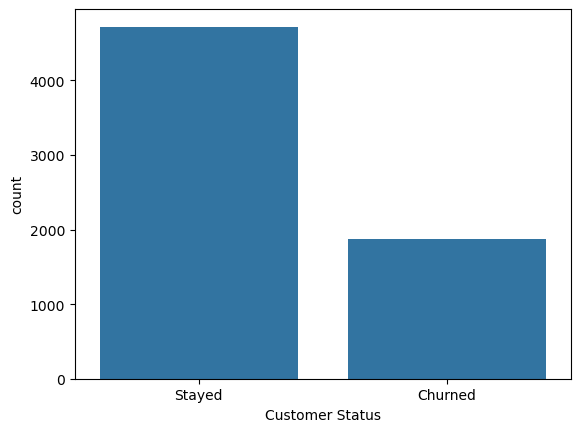

In [22]:
sns.countplot(data=df, x='Customer Status')

In [20]:
df = df[df['Customer Status'] != 'Joined']

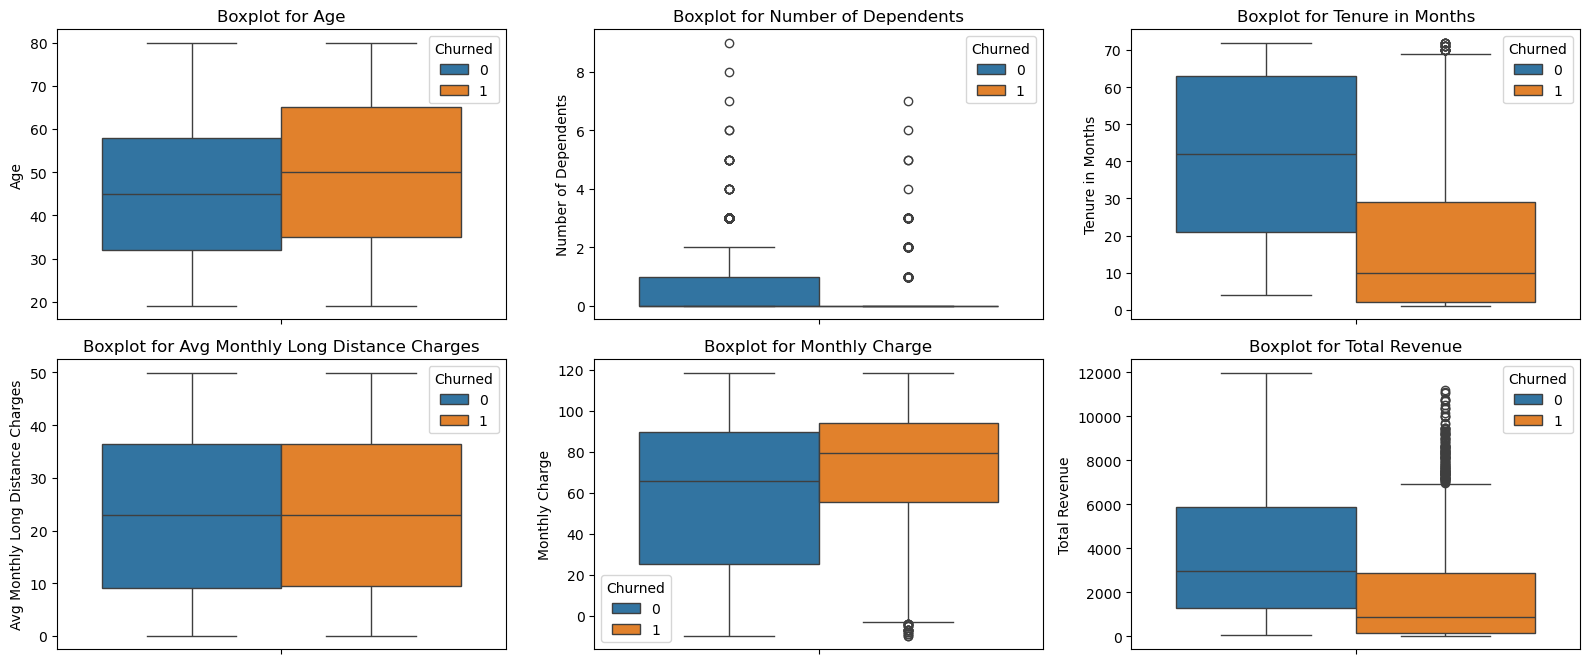

In [28]:
# Список проверяемых численных полей
numerical_columns = ['Age', 'Number of Dependents', 'Tenure in Months', 
                     'Avg Monthly Long Distance Charges',
                     'Monthly Charge', 'Total Revenue']

# Строим "ящики с усами" для каждой переменной по разделению ушел клиент или нет
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, hue='Churned')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()


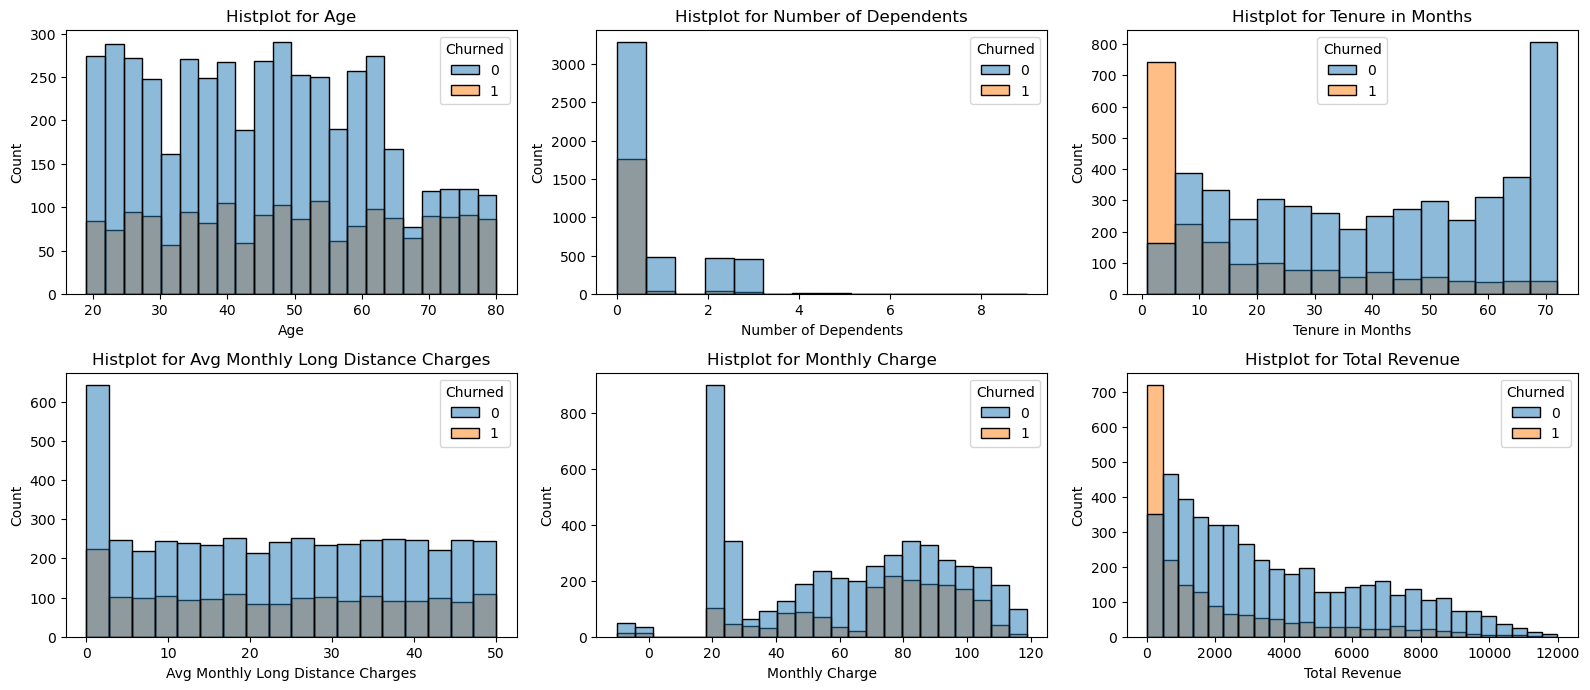

In [30]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='Churned', multiple='layer')
    plt.title(f'Histplot for {col}')
    plt.tight_layout()

plt.show()

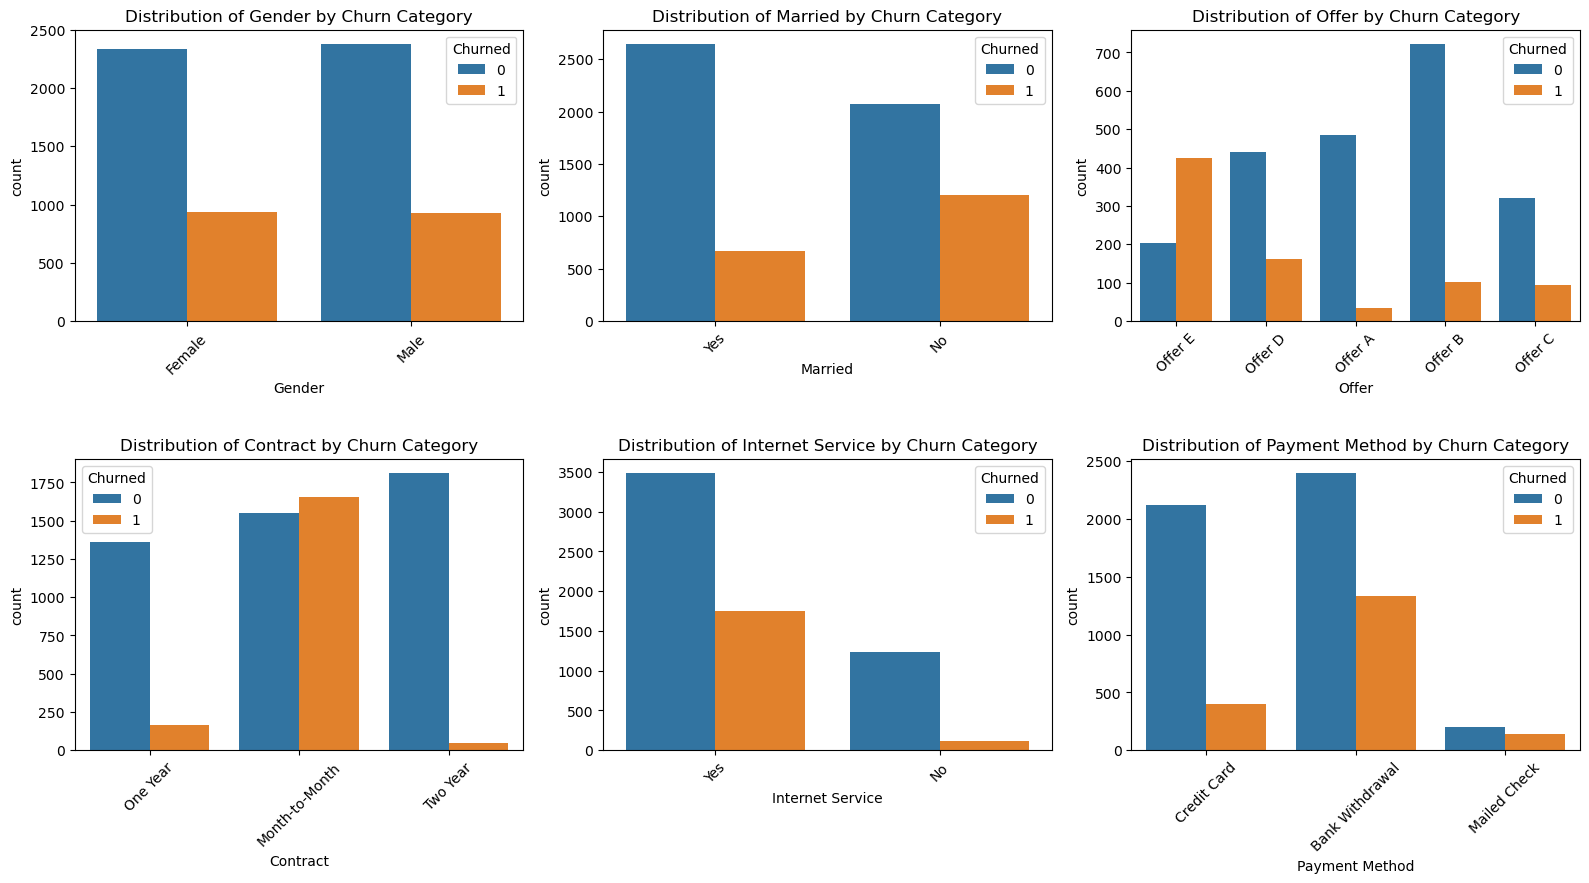

In [32]:
categorical_columns = ['Gender', 'Married',
                       'Offer', 'Contract',
                       'Internet Service', 'Payment Method', 
                        ]

# Настройка фигуры с подграфиками для каждой переменной
plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='Churned')
    plt.title(f'Distribution of {col} by Churn Category')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

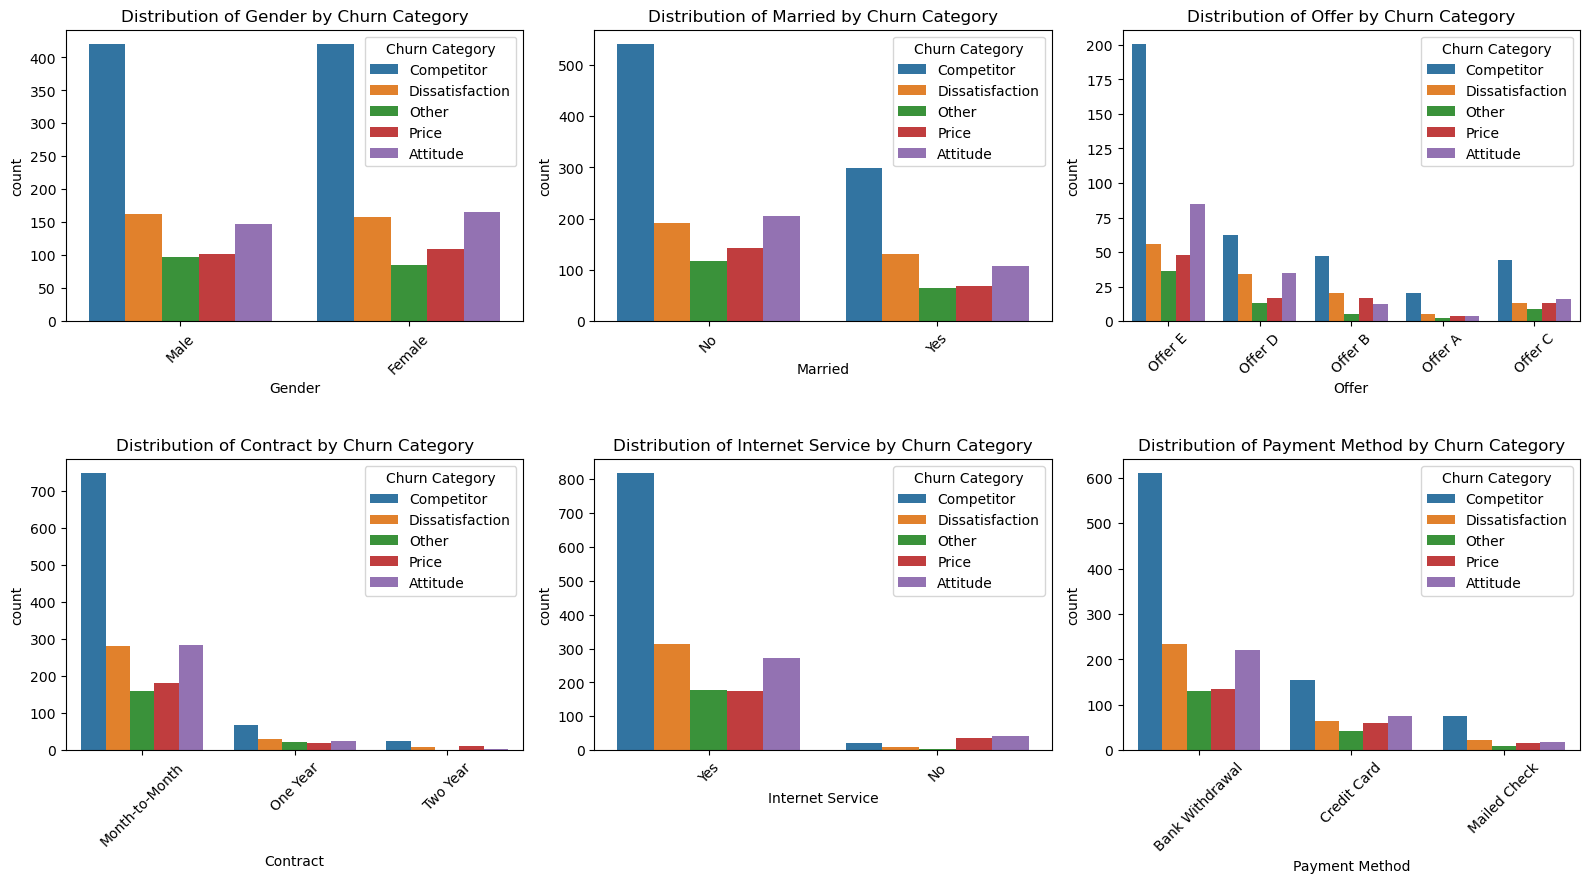

In [34]:
# Настройка фигуры с подграфиками для каждой переменной
plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df[df.Churned == 1], x=col, hue='Churn Category')
    plt.title(f'Distribution of {col} by Churn Category')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

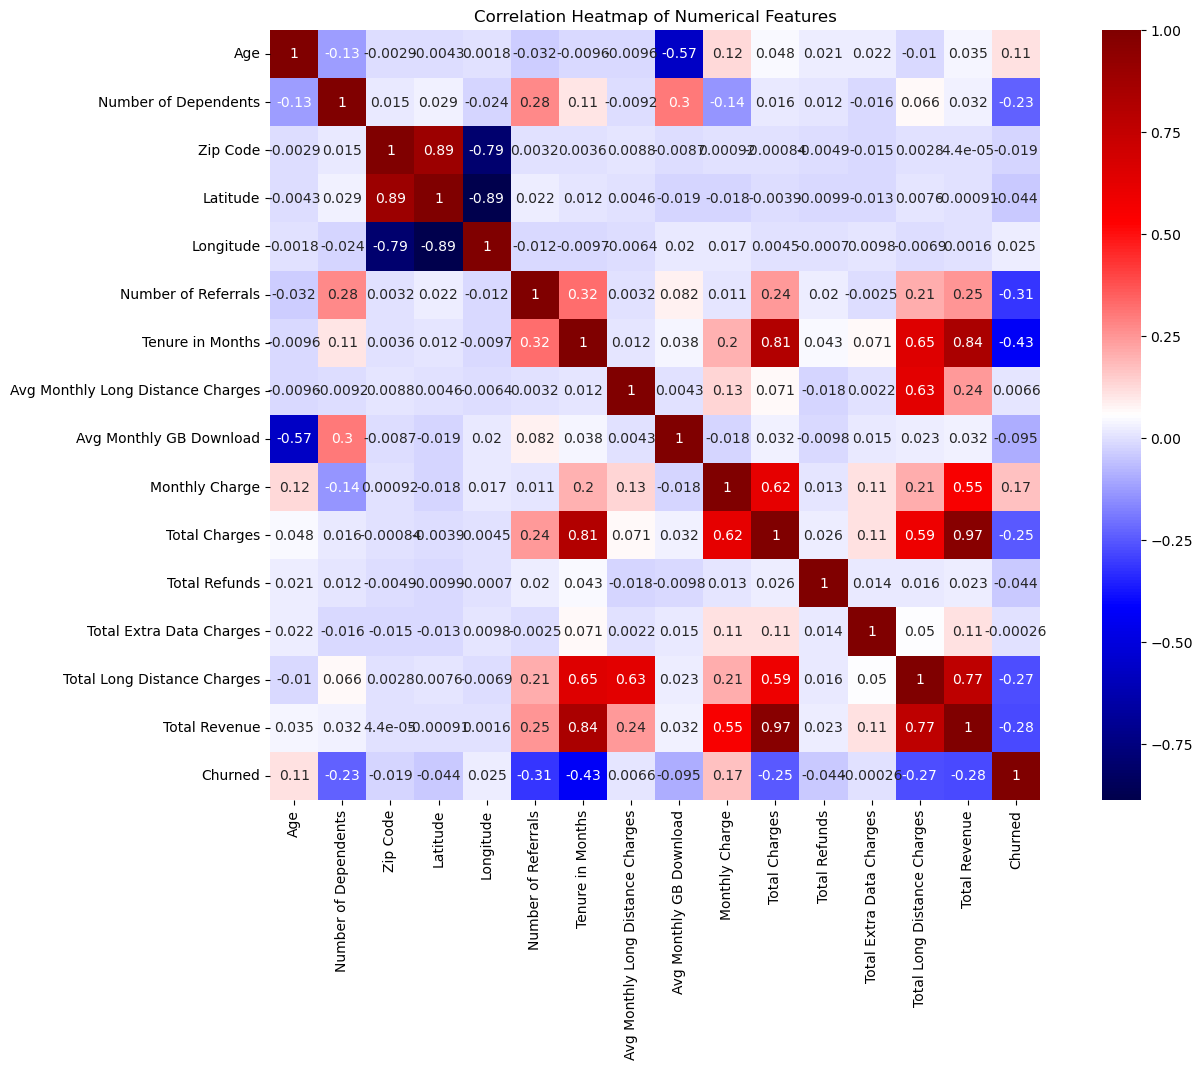

In [36]:
# Выбор всех числовых столбцов с помощью select_dtypes
numerical_df = df.select_dtypes(include='number')

# Построение корреляционной матрицы для числовых признаков
correlation_matrix = numerical_df.corr()

# Построение тепловой карты
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [38]:
import scipy.stats as stats

In [46]:
offer_churn_crosstab = pd.crosstab(df['Offer'], df['Churned'])
offer_churn_crosstab

Churned,0,1
Offer,,
Offer A,485,35
Offer B,723,101
Offer C,320,95
Offer D,441,161
Offer E,204,426


In [48]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(offer_churn_crosstab)
print(f'Chi-squared Test for Offer: Chi2={chi2_stat}, p={p_value}')

Chi-squared Test for Offer: Chi2=724.1634387398773, p=2.0413226901981057e-155


In [58]:
columns = [
    'Age',
    'Number of Dependents',
    'Monthly Charge'
]
for col in columns:
    print(f'Результат теста Левена для {col}: {stats.levene(df[df['Churned'] == 0][col], df[df['Churned'] == 1][col])}')

Результат теста Левена для Age: LeveneResult(statistic=29.65716775549364, pvalue=5.342484832664329e-08)
Результат теста Левена для Number of Dependents: LeveneResult(statistic=376.5025048697975, pvalue=1.3171481164772634e-81)
Результат теста Левена для Monthly Charge: LeveneResult(statistic=279.663803895133, pvalue=1.628072335435436e-61)


In [60]:
churned_age = df[df['Churned'] == 1]['Age']
not_churned_age = df[df['Churned'] == 0]['Age']
t_stat_age, p_value_age = stats.ttest_ind(churned_age, not_churned_age, equal_var=False)
print(f'T-test for Age: t-stat={t_stat_age}, p={p_value_age}')

T-test for Age: t-stat=8.80117459921137, p=2.167315693779738e-18


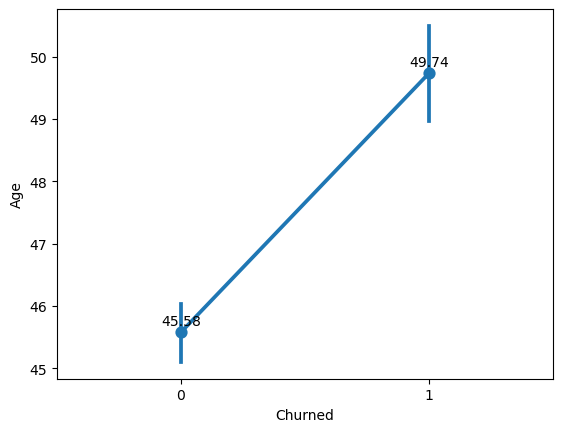

In [72]:
ax = sns.pointplot(data=df, y='Age', x='Churned')

# Получение средних значений для каждой группы
means = df.groupby('Churned')['Age'].mean()

# Добавление подписей на график
for i, mean in enumerate(means):
    ax.annotate(f'{mean:.2f}', xy=(i, mean), xytext=(0, 5), textcoords='offset points', ha='center', color='black', fontsize=10)

# Показать график
plt.show()

In [62]:
churned_dependents = df[df['Churned'] == 1]['Number of Dependents']
not_churned_dependents = df[df['Churned'] == 0]['Number of Dependents']
t_stat_dependents, p_value_dependents = stats.ttest_ind(churned_dependents, not_churned_dependents, equal_var=False)
print(f'T-test for Number of Dependents: t-stat={t_stat_dependents}, p={p_value_dependents}')

T-test for Number of Dependents: t-stat=-25.013024176731427, p=1.423703806023536e-131


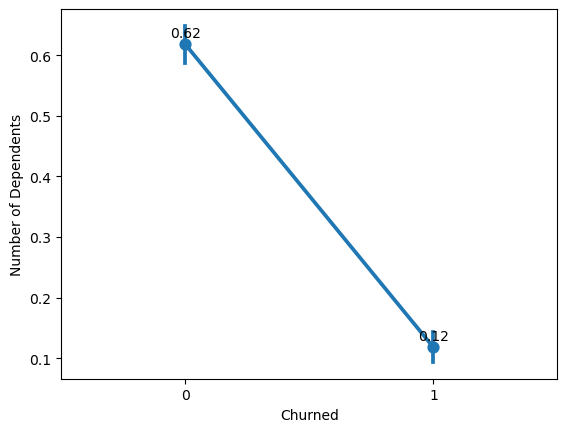

In [76]:
ax = sns.pointplot(data=df, y='Number of Dependents', x='Churned')

# Получение средних значений для каждой группы
means = df.groupby('Churned')['Number of Dependents'].mean()

# Добавление подписей на график
for i, mean in enumerate(means):
    ax.annotate(f'{mean:.2f}', xy=(i, mean), xytext=(0, 5), textcoords='offset points', ha='center', color='black', fontsize=10)

# Показать график
plt.show()

In [82]:
churned_dependents = df[df['Churned'] == 1]['Monthly Charge']
not_churned_dependents = df[df['Churned'] == 0]['Monthly Charge']
t_stat_dependents, p_value_dependents = stats.ttest_ind(churned_dependents, not_churned_dependents, equal_var=False)
print(f'T-test for Monthly Charge: t-stat={t_stat_dependents}, p={p_value_dependents}')

T-test for Monthly Charge: t-stat=15.091941264125897, p=3.8293242781599166e-50


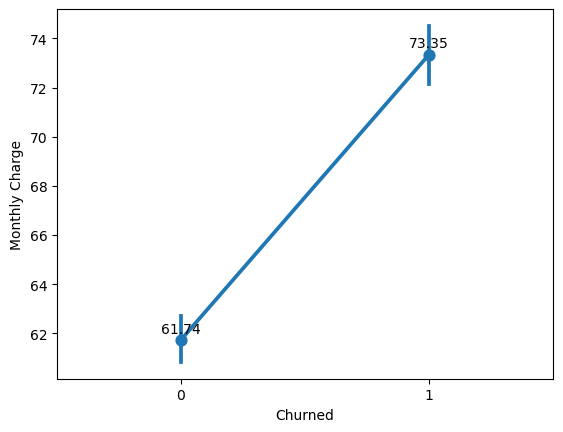

In [80]:
ax = sns.pointplot(data=df, y='Monthly Charge', x='Churned')

# Получение средних значений для каждой группы
means = df.groupby('Churned')['Monthly Charge'].mean()

# Добавление подписей на график
for i, mean in enumerate(means):
    ax.annotate(f'{mean:.2f}', xy=(i, mean), xytext=(0, 5), textcoords='offset points', ha='center', color='black', fontsize=10)

# Показать график
plt.show()